# **Low Risk Modelling**

## **Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#main
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

#viz
import seaborn as sns 
import matplotlib.pyplot as plt 

#mod
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM, Dropout 
from sklearn.metrics import mean_absolute_error

In [3]:
list_file = os.listdir('/content/drive/MyDrive/Colab_Notebooks/Dataset/low_risk')
list_file

['BNI AM Dana Likuid.csv',
 'Sucorinvest Money Market Fund.csv',
 'TRIM Kas 2.csv',
 'Manulife_dana_kas_kelas_A.csv',
 'Danamas_rupiah_plus.csv',
 'Sucorinvest Sharia Money Market Fund.csv',
 'Danareksa Seruni Pasar Uang II.csv',
 'Batavia Dana Kas Maxima.csv',
 'Danareksa Seruni Pasar Uang III.csv',
 'Bahana Dana Likuid.csv']

In [4]:
dataset = []
for file in list_file:
  name = file.split('.')[0]
  dataset.append(name)
print(dataset)

['BNI AM Dana Likuid', 'Sucorinvest Money Market Fund', 'TRIM Kas 2', 'Manulife_dana_kas_kelas_A', 'Danamas_rupiah_plus', 'Sucorinvest Sharia Money Market Fund', 'Danareksa Seruni Pasar Uang II', 'Batavia Dana Kas Maxima', 'Danareksa Seruni Pasar Uang III', 'Bahana Dana Likuid']


In [5]:
df = {}
for i in dataset:
  df[i] = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Dataset/low_risk/' +i +'.csv')

In [6]:
df['Manulife_dana_kas_kelas_A'].head()

,Unnamed: 0,date,value,Next,Class
0,0,2022/9/16,1640.75,1641.04,1
1,1,2022/9/19,1641.04,1641.14,1
2,2,2022/9/20,1641.14,1641.24,1
3,3,2022/9/21,1641.24,1641.34,1
4,4,2022/9/22,1641.34,1641.41,1


In [7]:
df['Manulife_dana_kas_kelas_A'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  66 non-null     int64  
 1   date        66 non-null     object 
 2   value       66 non-null     float64
 3   Next        65 non-null     float64
 4   Class       66 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.7+ KB


In [8]:
for i in dataset:
  df[i]['date'] = pd.to_datetime(df[i]['date']) 

In [9]:
df['Manulife_dana_kas_kelas_A'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  66 non-null     int64         
 1   date        66 non-null     datetime64[ns]
 2   value       66 non-null     float64       
 3   Next        65 non-null     float64       
 4   Class       66 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.7 KB


In [10]:
df_new = {}
for i in dataset:
  size = int(len(df[i]) * 0.8)
  df_new[i] = {}
  df_new[i]['train'] = df[i]['value'].iloc[0:size]
  df_new[i]['test'] = df[i]['value'].iloc[size-1:len(df[i])]

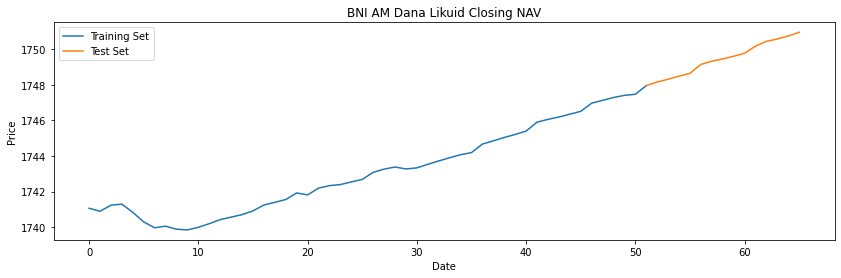

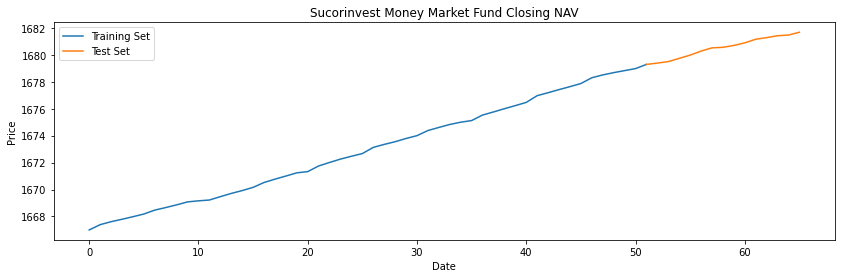

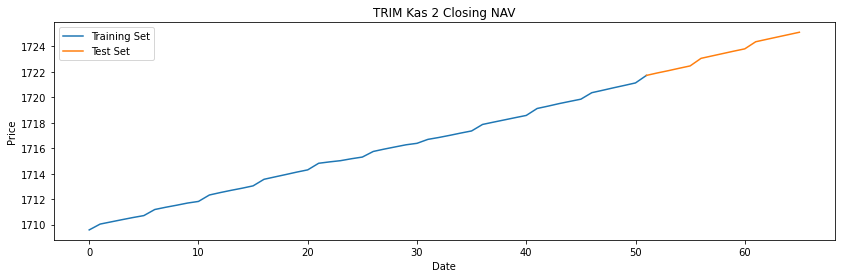

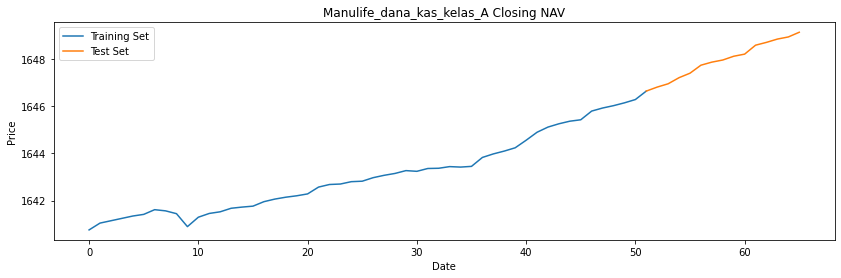

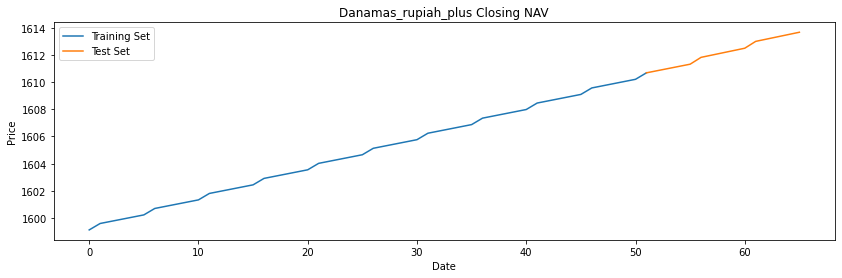

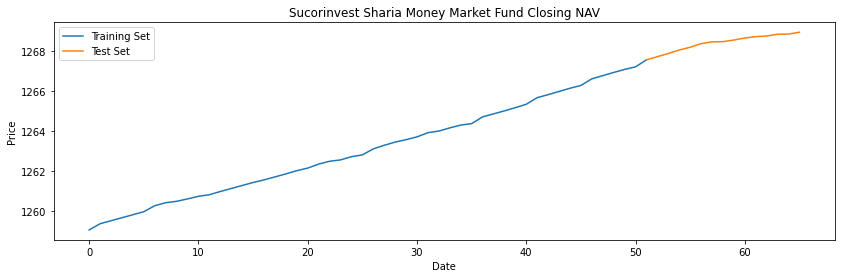

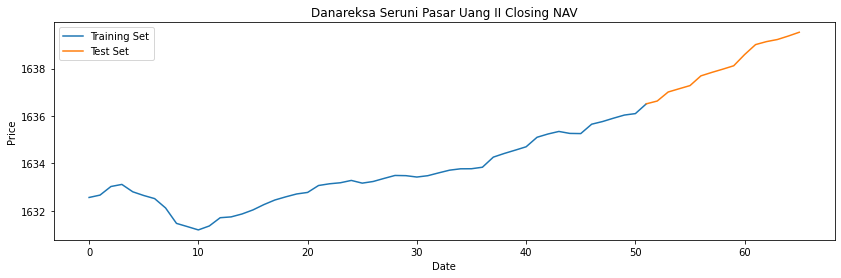

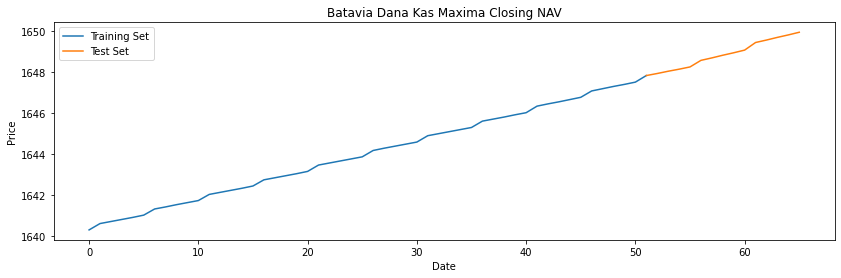

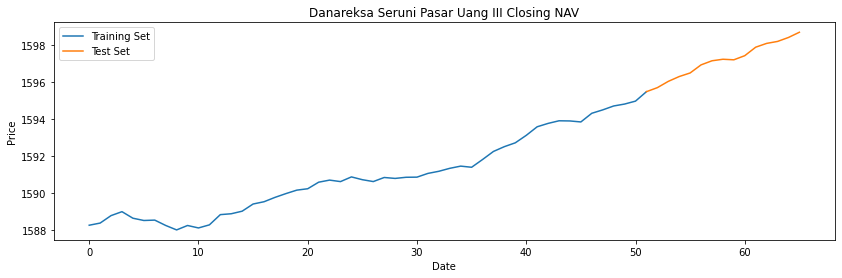

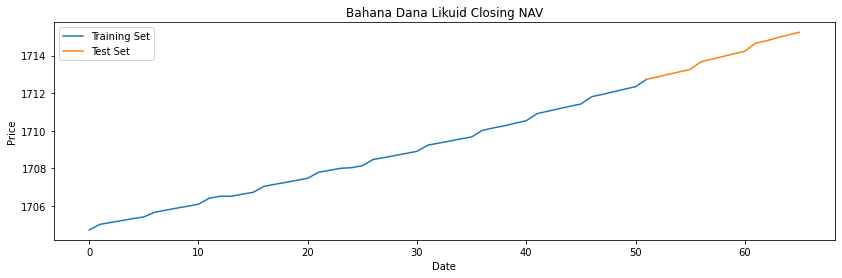

In [11]:
for i in dataset:
    plt.figure(figsize=(14,4))
    plt.plot(df_new[i]["train"])
    plt.plot(df_new[i]["test"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing NAV")

In [12]:
# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(dataset):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["train"])
    a1 = np.array(df_new[i]["test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc
    
del a0
del a1

In [14]:
transform_test["Manulife_dana_kas_kelas_A"].shape

(15, 1)

In [15]:
trainset = {}
testset = {}
for j in dataset:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(1, 48):
        X_train.append(transform_train[j][i-1:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(1,14):
        X_test.append(transform_test[j][i-1:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

In [16]:
arr_buff = []
for i in dataset:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=dataset)

,X_train,y_train,X_test,y_test
BNI AM Dana Likuid,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Sucorinvest Money Market Fund,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
TRIM Kas 2,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Manulife_dana_kas_kelas_A,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Danamas_rupiah_plus,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Sucorinvest Sharia Money Market Fund,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Danareksa Seruni Pasar Uang II,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Batavia Dana Kas Maxima,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Danareksa Seruni Pasar Uang III,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"
Bahana Dana Likuid,"(47, 1, 1)","(47,)","(13, 1, 1)","(13,)"


# Models

In [17]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_mae') is not None and logs.get('val_mae') < 0.015:
      self.model.stop_training = True

In [18]:
# model = Sequential([LSTM(64, input_shape=(1, 1), return_sequences=True),
#                     LSTM(32),
#                     Dense(25, activation='relu'),
#                     Dense(1)])

In [19]:
%%time
# The LSTM architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compiling the RNN
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
              metrics=["mae"], 
              loss=tf.keras.losses.Huber())

#Training Models
for i in dataset:
    print("Train to", i)
    model.fit(trainset[i]["X"], 
              trainset[i]["y"], 
              epochs=1000, 
              batch_size=8,
              validation_data=(X_test, y_test), 
              shuffle=False,
              callbacks=[Callback()])

Streaming output truncated to the last 5000 lines.
Epoch 503/1000
6/6 [==============================] - 0s 20ms/step - loss: 4.4177e-04 - mae: 0.0229 - val_loss: 0.0024 - val_mae: 0.0535
Epoch 504/1000
6/6 [==============================] - 0s 21ms/step - loss: 4.7001e-04 - mae: 0.0236 - val_loss: 0.0024 - val_mae: 0.0536
Epoch 505/1000
6/6 [==============================] - 0s 17ms/step - loss: 4.7969e-04 - mae: 0.0234 - val_loss: 0.0023 - val_mae: 0.0524
Epoch 506/1000
6/6 [==============================] - 0s 16ms/step - loss: 4.9835e-04 - mae: 0.0256 - val_loss: 0.0023 - val_mae: 0.0518
Epoch 507/1000
6/6 [==============================] - 0s 15ms/step - loss: 6.4746e-04 - mae: 0.0277 - val_loss: 0.0023 - val_mae: 0.0519
Epoch 508/1000
6/6 [==============================] - 0s 17ms/step - loss: 6.9306e-04 - mae: 0.0288 - val_loss: 0.0022 - val_mae: 0.0516
Epoch 509/1000
6/6 [==============================] - 0s 17ms/step - loss: 6.6824e-04 - mae: 0.0283 - val_loss: 0.0022 - val_ma

1/1 [==============================] - 0s 23ms/step


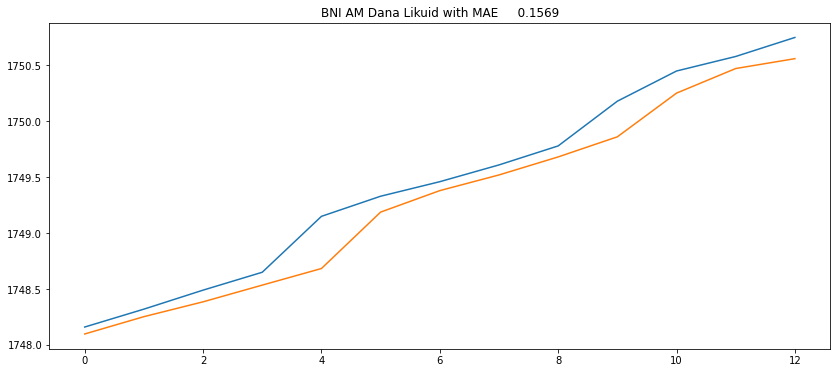

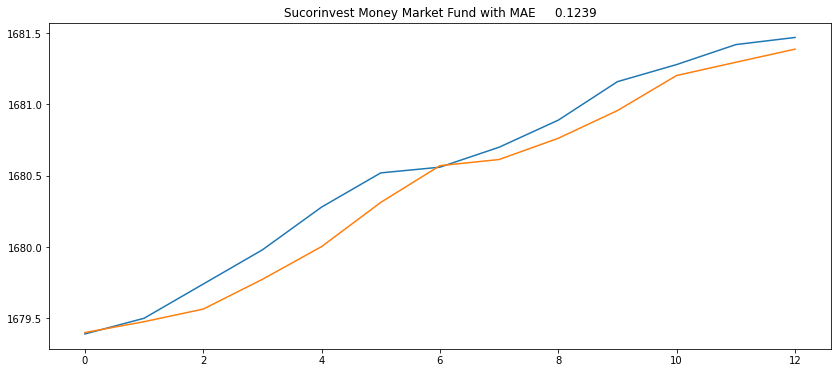

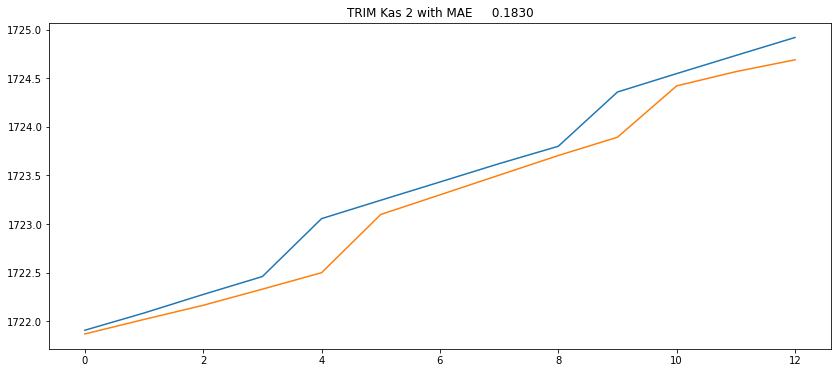

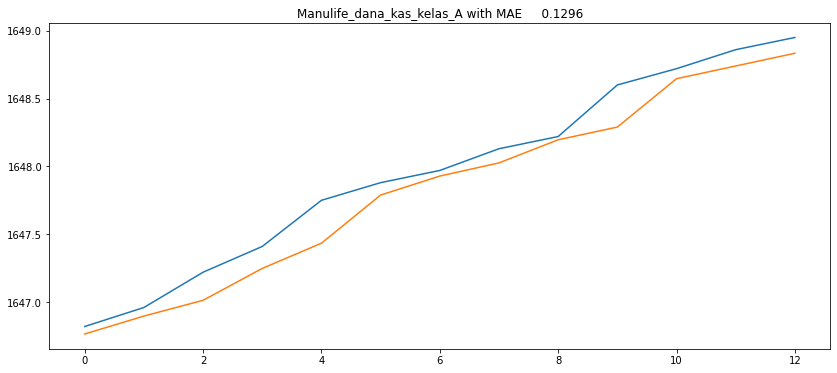

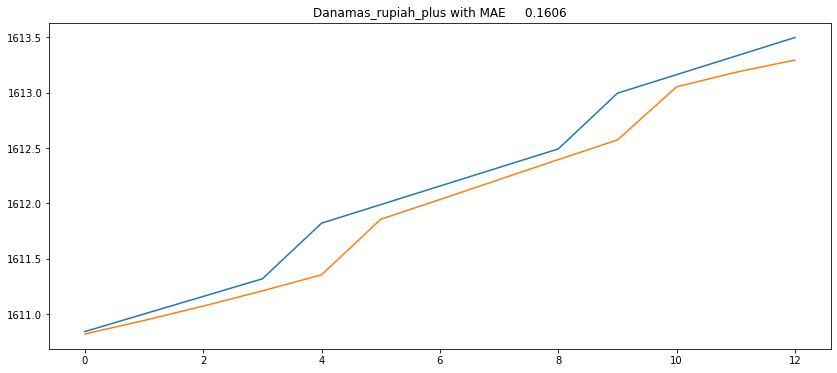

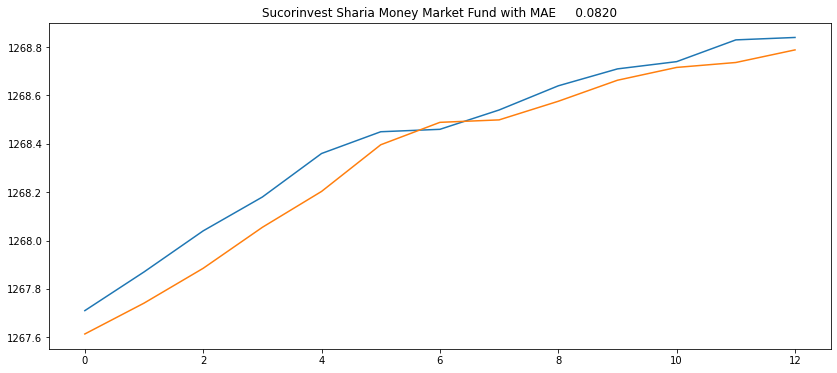

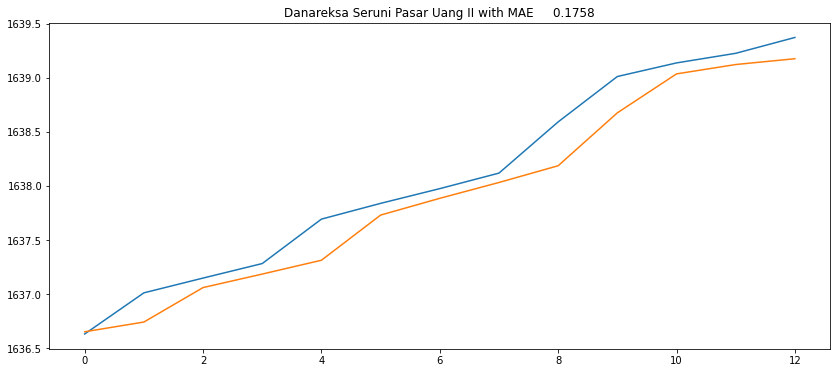

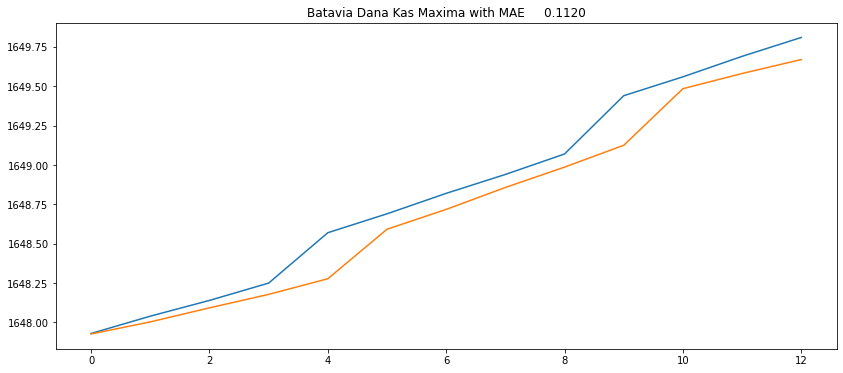

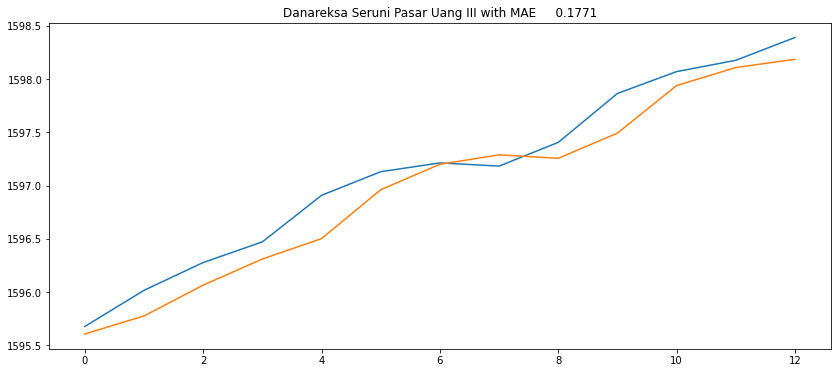

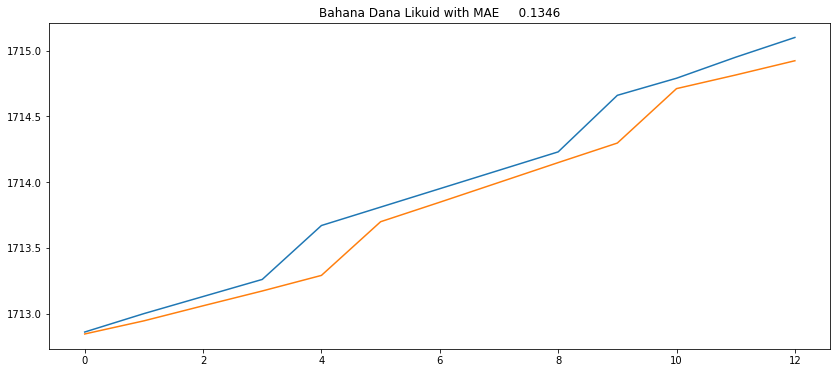

In [23]:
pred_result = {}
for i in dataset:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
    MSE = mean_absolute_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MAE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)